In [2]:
import dlib
import numpy as np
import cv2
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [3]:
frontalface_detector=dlib.get_frontal_face_detector()

In [4]:
def rect_to_bb(rect):
    x=rect.left()
    y=rect.top()
    w=rect.right()-x
    h=rect.bottom()-y
    return (x,y,w,h)


In [5]:
def detect_face(image_url):
    try:
         url_response = urlopen(image_url)
         img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
         image = cv2.imdecode(img_array, -1)
         type(image)
         rects=frontalface_detector(image,1)
         if (len(rects)<1):
            return "no face"
         for (i,rect) in enumerate(rects) :
            (x,y,w,h)=rect_to_bb(rect)
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
         plt.imshow(image, interpolation='nearest')
         plt.axis('off')
         plt.show()
    except:
        print('whoops')

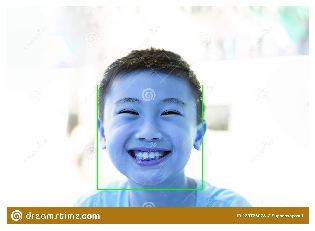

In [6]:
url='https://thumbs.dreamstime.com/z/happy-little-boy-smiley-face-portrait-human-concept-freshness-133726078.jpg'
detect_face(url)